Step 1: Import Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap


 Step 2: Load and Explore Dataset

In [6]:
# Load your dataset
df = pd.read_csv('Zoo.csv')  

# Basic Info
print(df.head())
print(df.info())
print(df.describe())
print(df['type'].value_counts())


  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  
<class '

Step 3: Visualize the Data

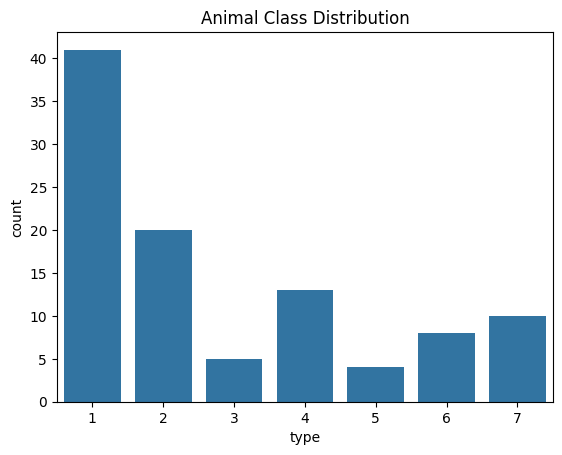

In [10]:
# Check class distribution
sns.countplot(data=df, x='type')
plt.title('Animal Class Distribution')
plt.show()




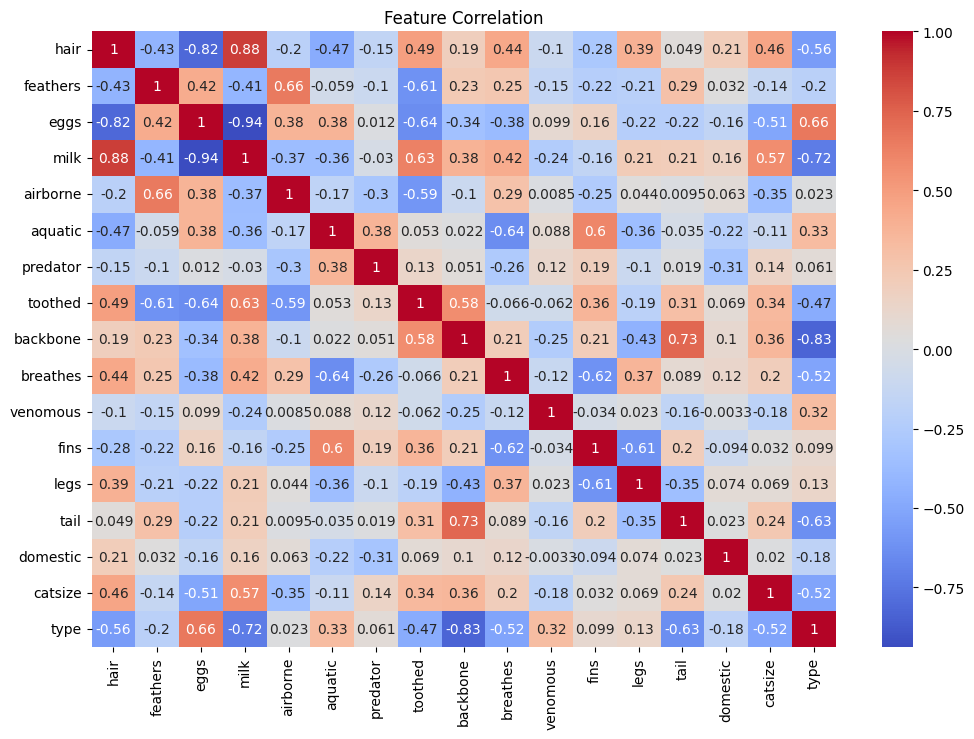

In [12]:
# Drop non-numeric columns before correlation
df_numeric = df.select_dtypes(include=[np.number])  

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


Step 4: Data Preprocessing

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


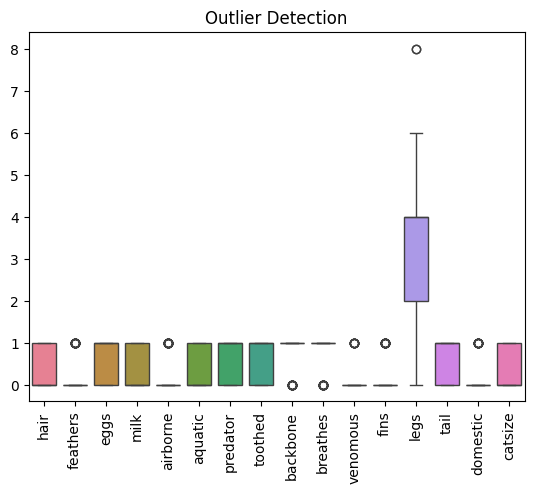

In [14]:
# Drop irrelevant columns if present
if 'animal_name' in df.columns:
    df = df.drop('animal_name', axis=1)

# Check missing values
print(df.isnull().sum())

# Check for outliers 
sns.boxplot(data=df.drop('type', axis=1))
plt.title('Outlier Detection')
plt.xticks(rotation=90)
plt.show()


Step 5: Train-Test Split

In [22]:
# Step 1: Drop non-feature columns 
if 'animal_name' in df.columns:
    df = df.drop('animal_name', axis=1)
elif 'Animal' in df.columns:
    df = df.drop('Animal', axis=1)
elif 'name' in df.columns:
    df = df.drop('name', axis=1)

# Step 2: Separate features and target
X = df.drop('type', axis=1)
y = df['type']

# Step 3: Check if any non-numeric columns remain
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols.tolist())

# Step 4: Drop any leftover non-numeric columns
X = X.drop(non_numeric_cols, axis=1)

# Step 5: Standardize the numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Non-numeric columns: ['animal name']


Step 6:Implement KNN

In [26]:
# Instantiate model with k=5 
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  

# Train
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)


Step 7: Evaluate Performance

Accuracy: 0.9523809523809523
Precision: 0.9206349206349207
Recall: 0.9523809523809523
F1 Score: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



C:\Users\joghi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\joghi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\joghi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\joghi\anaconda3\Lib

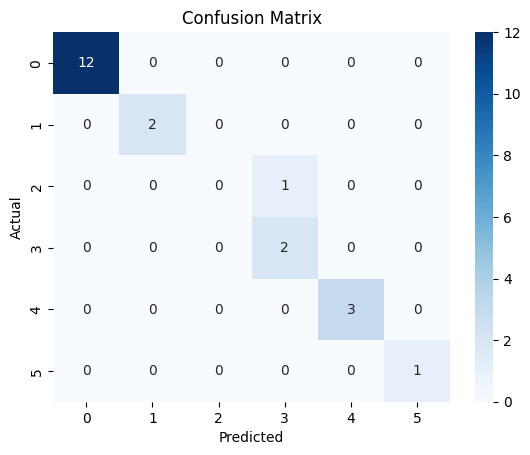

In [28]:
# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


 Step 8: Visualize Decision Boundaries (2D PCA Reduction)

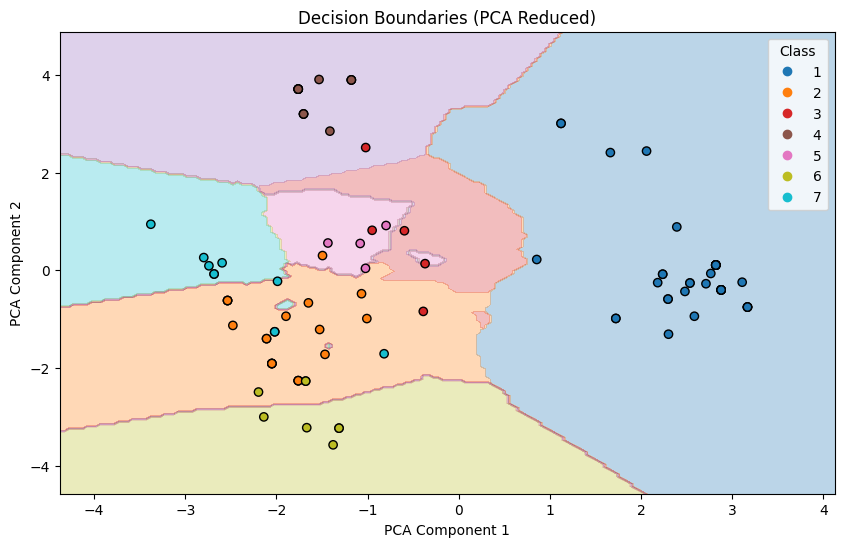

In [30]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit on reduced features
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca, y)

# Meshgrid for decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
cmap = ListedColormap(sns.color_palette("tab10").as_hex())
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap, edgecolor='k')
plt.title("Decision Boundaries (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(*scatter.legend_elements(), title="Class")
plt.show()


Conclusion

* Data was analyzed and visualized

* Preprocessing involved scaling, checking for nulls, and removing names

* KNN was implemented with k=5, and Euclidean distance

* Model performance was evaluated with classification metrics

* Decision boundaries were visualized using PCA-reduced 2D space

Interview Questions:

1. What are the key hyperparameters in KNN?

1. n_neighbors (K)
2. metric
3. weights
4. algorithm
5. leaf_size

2. What distance metrics can be used in KNN?

In K-Nearest Neighbours (KNN), distance metrics are used to measure how "close" two data points are. The choice of distance metric can greatly affect the model's performance, especially with different types of data.

1. Euclidean Distance (L2 norm)
2. Manhattan Distance (L1 norm / Taxicab)
3. Minkowski Distance
4. Chebyshev Distance (L∞ norm)
5. Cosine Similarity (or Cosine Distance = 1 - similarity)
6. Hamming Distance
7. Mahalanobis Distance

      